In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab10')

In [2]:
def gaussian_pdf(x, mu, var):
    D = len(x)
    e = 1e-8
    ln_pdf = - 0.5 * ( np.dot(x - mu, x - mu) / (var + e) + D * np.log(np.abs(var)) + D * np.log(2*np.pi) )
    return np.exp(ln_pdf)

In [3]:
N = 100
D = 2
a = 10
b = 100
w = 0.5
#theta = np.random.multivariate_normal(mean=np.zeros(D), cov=np.identity(D))
theta = np.array([1,1])

X = np.zeros((N,D))
X[:int(w*N)] = np.random.multivariate_normal(mean=theta, cov=np.identity(D), size=int(w*N))
X[int(w*N):] = np.random.multivariate_normal(mean=np.zeros(D), cov=np.identity(D)*a, size=N-int(w*N))

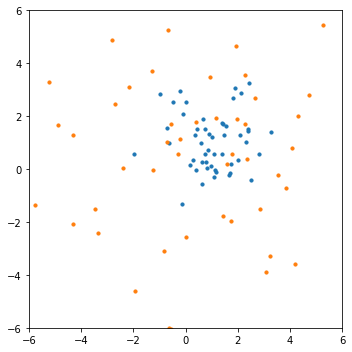

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:int(w*N),0], X[:int(w*N),1], s=10, color=cmap(0))
plt.scatter(X[int(w*N):,0], X[int(w*N):,1], s=10, color=cmap(1))
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.tight_layout()
#plt.savefig('data.png', bbox_inches='tight')

In [5]:
max_iter = 100
e = 1e-8
mu_prior = np.array([0.0,0.0])
var_prior = b
mu_new = np.copy(mu_prior)
var_new = np.copy(var_prior)

mu = np.zeros((N,D))
var = np.ones(N) * 999.0
scale = np.sqrt((2 * np.pi * var)**D)
evidence = np.zeros(max_iter)

for i in range(max_iter):
    for n in range(N):
        var_cav = var[n] * var_new / (var[n] - var_new)
        mu_cav = mu_new + (mu_new - mu[n]) * var_cav / var[n]
        
        z_norm = ( (1 - w) * gaussian_pdf(X[n], mu_cav, (1+var_cav)) 
                  + w * gaussian_pdf(X[n], np.zeros(D), a) )
        
        rho = 1 - w * gaussian_pdf(X[n], np.zeros(D), a) / (z_norm+e)
        var_new = ( var_cav - rho * var_cav**2 / (var_cav + 1) 
                   + rho * (1 - rho) * var_cav**2 * np.dot(X[n] - mu_cav, X[n] - mu_cav) / (D * (var_cav + 1)**2) )
        mu_new = mu_cav + rho * var_cav * (X[n] - mu_cav) / (var_cav + 1)
        
        var[n] = var_new * var_cav / (var_cav - var_new)
        mu[n] = mu_cav + (var[n] + var_cav) * (mu_new - mu_cav) / var_cav
        scale[n] = z_norm / ( np.sqrt((2 * np.pi * var[n])**D) * gaussian_pdf(mu[n], mu_cav, (var[n]+var_cav)) )
        
print(theta)
print(mu_new, var_new)

[1 1]
[ 1.17613383  1.07267182] 0.0327877614257


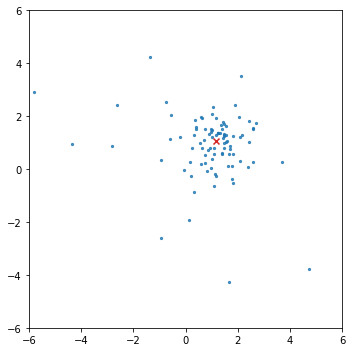

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(mu[:,0], mu[:,1], s=5.0, color=cmap(0), alpha=0.8)
plt.scatter(mu_new[0], mu_new[1], color=cmap(3), marker='x')
#plt.scatter(theta[0], theta[1], color=cmap(3))
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.tight_layout()
#plt.savefig('ep_result.png', bbox_inches='tight')